## Nearest Neighbors Classifier

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

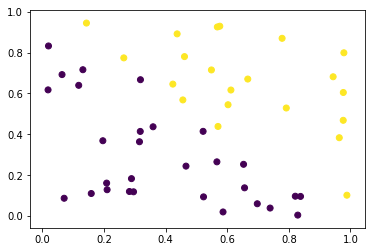

In [2]:
np.random.seed(0)

# Generate 50 random points
train_data = np.random.random((50,2))

# All points with x + y > 1
train_labels = (train_data[:, 0] + train_data[:, 1]) > 1
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels)

In [3]:
class NearestNeighbors():
    def __init__(self):
        self.train_data = None
        self.train_labels = None
    
    def fit(self, train_data, train_labels):
        '''
        train_data is shape (N, D) where N is the number of data points and D is the dimension of each data point. 
        '''
        self.train_data = train_data
        self.train_labels = train_labels
    
    def predict(self, data):
        '''
        data is shape (M, D) where M is the number of data points and D is the dimension of each data point
        '''
        dist_matrix = self._get_dist_matrix_(data)
        
        argmin = np.argmin(dist_matrix, axis=0)
        return self.train_labels[argmin]
    
    def _get_dist_matrix_(self, data):
        '''
        data is shape (M, D) where M is the number of data points and D is the dimension of each data point
        return a matrix of shape (N, M) where the ith jth element is the distance between self.train[i] and
        data[j]
        '''
        dist = np.empty((self.train_data.shape[0], data.shape[0]))
        for j in range(data.shape[0]):
            dist[:, j] = np.mean((self.train_data - data[j])**2, axis=1)
        return dist

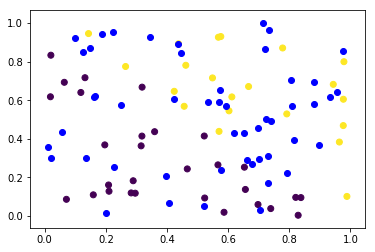

In [4]:
test_data = np.random.random((50, 2))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels)
plt.scatter(test_data[:, 0], test_data[:, 1], c='blue')

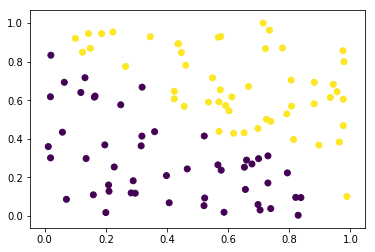

In [5]:
nn = NearestNeighbors()
nn.fit(train_data, train_labels)
test_labels = nn.predict(test_data)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels)
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels)

## Digit Classification

In [6]:
from sklearn.datasets import load_digits

Image Shape:  (1797, 8, 8)
Target Shape:  (1797,)
Flatten Image Shape:  (1797, 64)


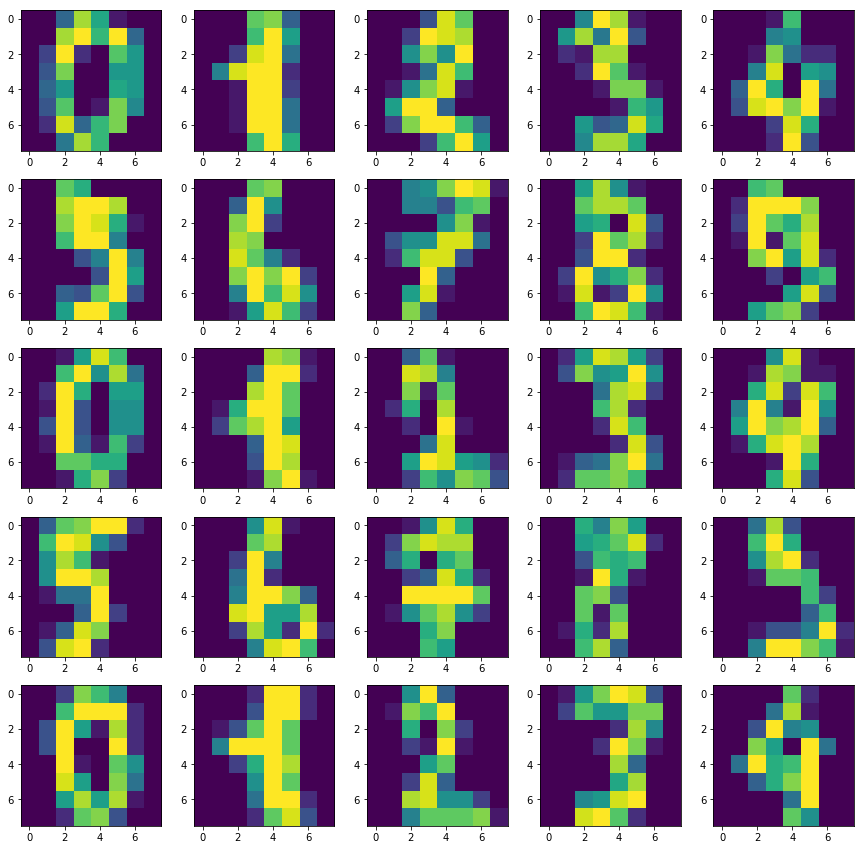

In [8]:
data = load_digits()
images = data['images']
targets = data['target']
print('Image Shape: ', images.shape)
print('Target Shape: ', targets.shape)
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
for i in range(5):
    for j in range(5):
        axes[i, j].imshow(images[i*5+j])
        
# Flatten images
images = images.reshape((images.shape[0], -1))
print('Flatten Image Shape: ', images.shape)

In [9]:
# Split training and testing images
train_split = np.random.random(images.shape[0]) < 0.6
test_split = np.logical_not(train_split)
train_images = images[train_split]
test_images = images[test_split]
train_labels = targets[train_split]
test_labels = targets[test_split]
print('Training Image Shape: ', train_images.shape)
print('Testing Image Shape: ', test_images.shape)
print('Training Label Shape: ', train_labels.shape)
print('Testing Label Shape: ', test_labels.shape)

Training Image Shape:  (1062, 64)
Testing Image Shape:  (735, 64)
Training Label Shape:  (1062,)
Testing Label Shape:  (735,)


Accuracy:  0.9836734693877551


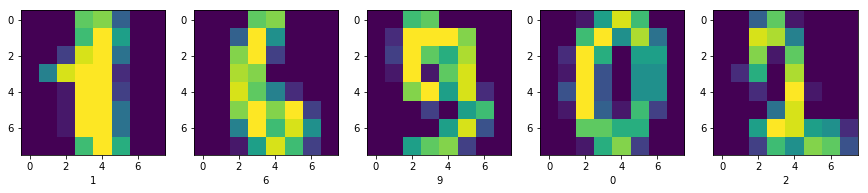

In [11]:
nn_classifier = NearestNeighbors()
nn_classifier.fit(train_images, train_labels)
estimate_labels = nn_classifier.predict(test_images)
print('Accuracy: ', np.mean(estimate_labels == test_labels))

fig, axes = plt.subplots(1, 5, figsize=(15, 15))
for i in range(5):
    axes[i].imshow(test_images[i].reshape(8, 8))
    axes[i].set_xlabel(estimate_labels[i])